# 이미지 처리 history

In [ ]:
# 이미지데이터

# 1) 가장 초기 : DNN ---> CNN
#    일반적인 NN보다는 특징 추출도 네트워크에 시키자
#    Conv + Pool (3X3, 5X5, 7X7, 11X11 etc)

# 2) VGG : 위로 쌓기 시작함... + C-P===> C-C-C-P

# 3) Inception : 위로 쌓을 때 여러 Conv 종합해서 하자!!!

# 4) ResNet : VGG보다 더 쌓아보면,,,성능이 별로여서..
#    ==> 중간에 값을 뽑아서 by pass해서 추가하자!!!!
#    ==> 학습이 네트워가 깊어져도 잘 되도록!!!!

# 5) etc +++ Trasformer!!!!! (블럭 단위!!!)

# AE

In [ ]:
# AutoEncoder : AE
# ===> 모델의 기본적인 구조를 대칭형을 사용을 함!!!!!!

# 이미지 ---- 이미지
# 출력의 대상을 : 기존의 회귀/분류가 아니라 이미지 같은 대상..

# ==> 입력 : 인코더
#     출력 : 디코더

# 한글 ---> utf8인코딩 --> utf-8디코딩

# ===> CNN내용들을...최종적인 특징에 대한 FM
#      그 입력에 대한 근원적인 벡터값을 생각함!!!(seed)
#      입력에 대한 상당히 추상화된 뭔가의 근원적인 값이지!!!

# 전통적으로 AE( 자체로는 거의 안 씀,,구조는 차용!!!)
# 1. 고차원 데이터를 축소하는 곳에서도 사용!!!
# 2. 이미지에 대한 복원, 고해상도, 노이즈 제거....
# ===> 이런 개념을 응용해서 생성쪽으로 넘어가게 됨!!!!
#      + VAE( 확률 분포로 바라봅니다...)

# 기존은 값을 중심으로 바라보고,,그 값이 유사하도록 학습을 진행
# ===> 확률 분포로 놓고,,,,,,
# ===> 2대상의 확률분포의 값이 얼마나 유사한지!!!!
# ( 계산일반적인 값에 추정이 아니라,,확률 분포 유사도 계산!!!)
#   수식이............길고,,,표현도 행렬+확률분포+
#                             계산도 복잡함....
#  loss에 대한 계산이 확률분포의 유사도 중심으로 변경!!!(복잡함)

# < 저해상도 고해상도 변환 >

# 모델1

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 이미지를 넣어서 동일한 이미지를 출력할 거임

In [3]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()

print(train_X.shape , train_y.shape)
print(test_X.shape, train_y.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (60000,)


In [4]:
# 0~255까지 정규화
train_X = train_X /255.0
test_X  = test_X / 255.0

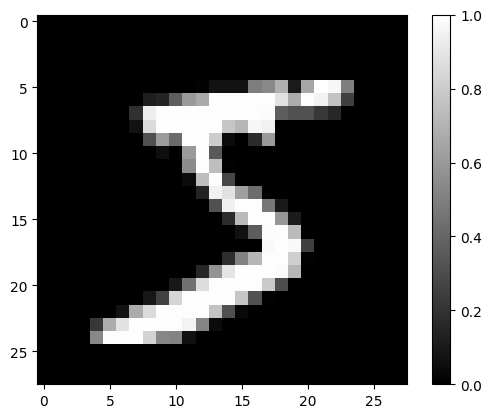

In [5]:
# 이미지 데이터를 가지고 와서
plt.imshow(train_X[0], cmap="gray") # , cmap="gray"안하면 컬러로 나옴
plt.colorbar()

In [ ]:
# 모델의 구조 : AE를 기본적으로 가장 간단한 Dense로 중심으로 구현!!!!
# ---> 입력 데이터 : 1장 샘플로 생각!!

# (28,28) ---> 784개 픽셀/노드
#               ---(인코더, 인코딩 Dense) -- 근원적인 64값 -
#               ---(디코더, 디코딩 Dense)
#         --- 784개의 노드의 값
# (28,28) 출력에 대한 모양만 변경


# ==> 인코더 : 받은 수 있는 Dense//출발은 784
# ======> ( 잠재적인 근원적인 벡터 ) : 64 크기의 벡터로 변환
#                              Dense레이어의 64개 노드 출력값
# ==> 디코더 : 줄여지긴 전의 784개의 값들로 복원....
# ==> 출력   : 28 28 2D 이미지로 변경해서 출력!!!!


In [ ]:
# 입력 데이터 정리 : (60000, 784) 2D 입력을 던지겠습니다..
# ( 60000,28,28) ---> ( 60000, 784)
# 1장 샘플에 대한 차원을 2차원에서 1차원으로 변경!!!!
# 바로 Dense에 연결하기 위해서..Flatten(*) 사용안하고,,,

In [6]:
train_X = train_X.reshape( -1, 28*28 ) # -1 차원을 자동 계산하도록 함
test_X  = test_X.reshape(-1, 28*28 )
print(train_X.shape)
print(test_X.shape)

(60000, 784)
(10000, 784)


In [7]:
from tensorflow.keras.layers import Dense

In [8]:
# 모델의 구조
model = tf.keras.Sequential(
    [
        Dense( input_shape=(28*28,), units=784, activation="relu"),
        Dense( units = 64, activation="relu"),
        Dense( units = 784, activation="relu"),
    ]
)


# 모델 학습 세팅
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="mse"
)
# ==> loss에서 mse를 사용한 이유 : 원본 픽셀의 값과
#                                  출력으로 나온 추정된 픽셀값과
#                                  값이 최대한 오차가 적도록!!!
# ==> 회귀와 동일한 구조!!! 계산의 편의상 mse

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
Total params: 716640 (2.73 MB)
Trainable params: 716640 (2.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 학습
model.fit(train_X, train_X, epochs = 20, batch_size=256) ## 왜 train y 가 아니라 train X냐, 자기 자신이 곧 답이기 때문.

Epoch 1/20
235/235 [==============================] - 11s 35ms/step - loss: 0.0294
Epoch 2/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0124
Epoch 3/20
235/235 [==============================] - 10s 41ms/step - loss: 0.0104
Epoch 4/20
235/235 [==============================] - 9s 40ms/step - loss: 0.0094
Epoch 5/20
235/235 [==============================] - 8s 34ms/step - loss: 0.0087
Epoch 6/20
235/235 [==============================] - 8s 35ms/step - loss: 0.0083
Epoch 7/20
235/235 [==============================] - 6s 26ms/step - loss: 0.0080
Epoch 8/20
235/235 [==============================] - 6s 27ms/step - loss: 0.0077
Epoch 9/20
235/235 [==============================] - 7s 28ms/step - loss: 0.0075
Epoch 10/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0073
Epoch 11/20
235/235 [==============================] - 7s 29ms/step - loss: 0.0072
Epoch 12/20
235/235 [==============================] - 6s 27ms/step - loss: 0.0071
Epoch 13/20

In [ ]:
60000/256

234.375

1/1 [==============================] - 0s 20ms/step


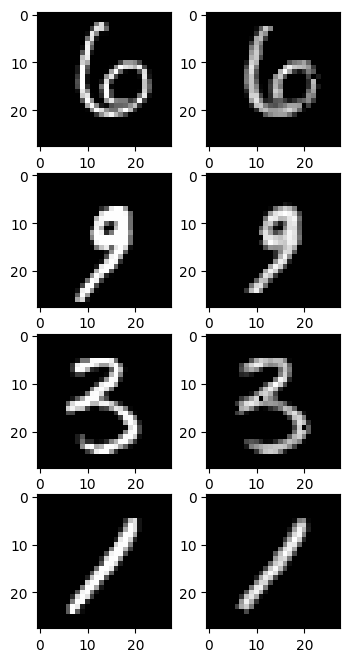

In [ ]:
# Test를 통해서 잘 학습이 되었나..보겠습ㅂ니다.....
# ===> test_X에서 선별해서 시험을 해보겠습니다.
random_index = [100,1000,5000,8887]
plt.figure( figsize=(4,8))

for idx in range(4):
    # test입력
    plt.subplot(4,2,idx*2 + 1)
    select_idx = random_index[idx]
    plt.imshow( test_X[select_idx].reshape(28,28), cmap="gray")

    # 오른쪽에는 모델로 나온 결과를 출력
    plt.subplot(4,2,idx*2 + 2) # (1,784) : reshape,cv2[], etc,np.
    img = model.predict( np.expand_dims(test_X[select_idx], axis=0))
    # img ---- (784,)
    plt.imshow(img.reshape(28,28), cmap="gray")

In [ ]:
# ===> 인코더/디코더
#      입력데이터가 이미지인데,,
#      이미지가 가진 특징을 사용한 것이 아니라
#      단순 픽셀값으로만 한 것임!!!!
#      인코도/디코더쪽의 레이어들을 이미지CNN
#      conv-pool로 수정해보자!!!
#      + convT-poolT
# ====> 다양한 모듈/ 블럭들이 단계를 형성하는 것!!!

# ++++ 다양한 입출력을 하게 됨!!!!!!

# 모델2

In [ ]:
# 모델2)
# ===> 기본적인 개념 ; 입력 이미지(28X28)에 대한 근원적인 값들(Latent Vector)
#      어떻게 근원적인 값들을 추출할까..

# ===> 이미지 데이터의 근본적인 특징은 Conv을 통해서 잘 나타내기에
#      Dense를 Conv 레이어로 수정을 해보자!!!

# ===> 앞에서의 Dense 대신에 Conv으로 할 때 뭔가 달라지느냐!!!
# Dense(노드의 수만 대칭적으로 구현!!!)
# Conv의 대칭적인 부분이 무엇이냐??????
# Conv Transpose

<img src="https://d2l.ai/_images/trans_conv.svg">

<img src="https://d2l.ai/_images/trans_conv_stride2.svg">

In [9]:
# ==> 입력 데이터의 모양을 변환!!!!!!!
#     Conv2D으로 인코더 파트를 구현을 하려고 함!!!!
#     ( 60000, 28, 28, 1)
# ==> 채널에 대한 숫자는 내가 신경안쓰고 처리하기 위해서!!!!
train_X = train_X.reshape(-1, 28,28,1)
test_X  = test_X.reshape(-1, 28,28,1)
# ==> 1개 샘플 중심으로 코드를 작성
# ==> -1은 자동으로 차원 확인
# ==> 1은 흑백으로 지정하겠다는 뜻

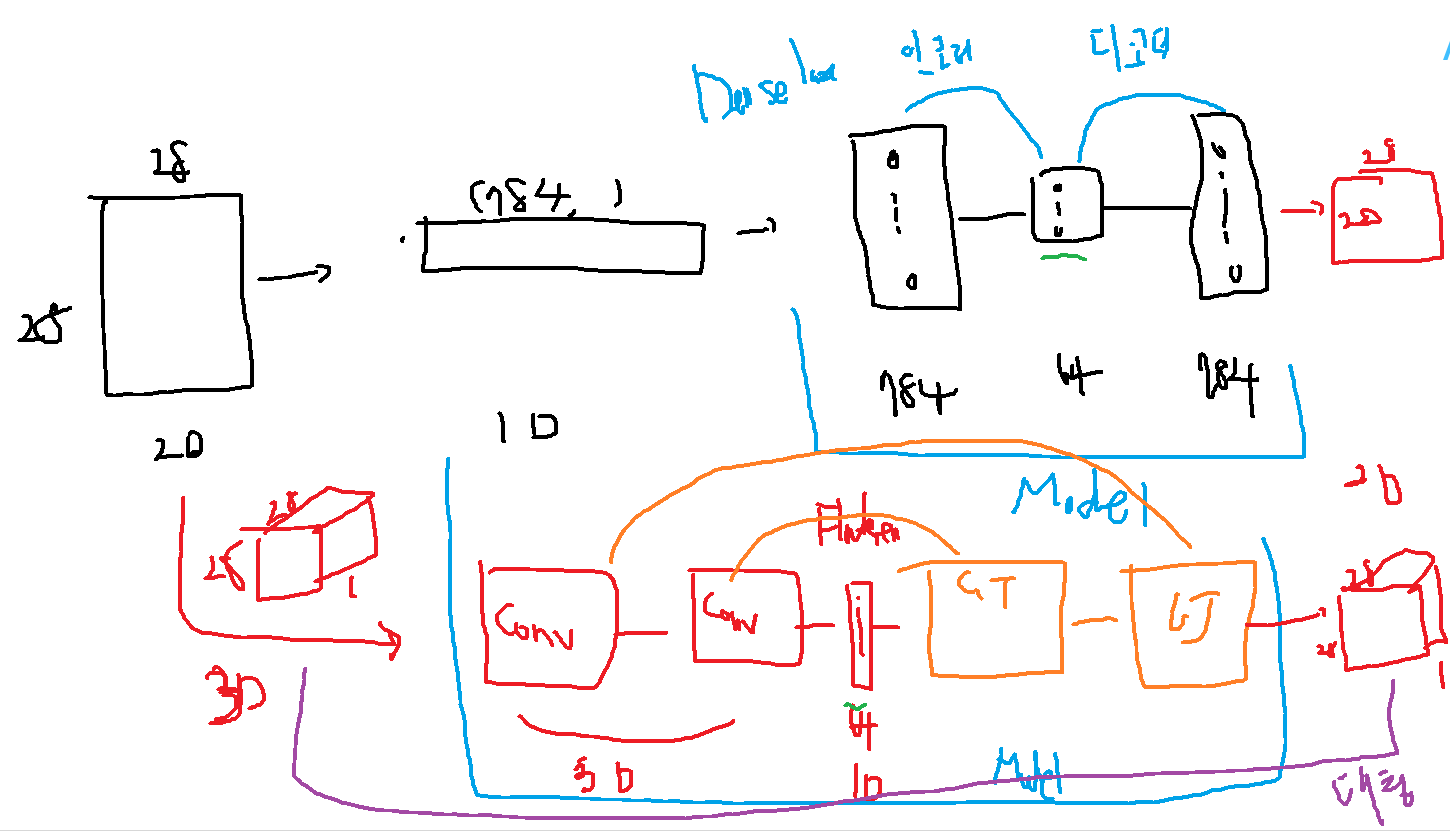

In [10]:
model = tf.keras.Sequential([

    # stride를 이용해서 conv1에서 크기를 줄임
    tf.keras.layers.Conv2D( input_shape =(28,28,1),
                           filters=32, kernel_size= 2, strides=(2,2),
                            activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2),
                           activation="relu"), # --->(7*7*64)


    ####################################################################
    # 3차원의 데이터의 차원을 1차원으로 축소!!!!!
    tf.keras.layers.Flatten(), #7*7*64

    ###########################################################
    # 28*28*1 1장에 대한 잠재적인 1차원 벡터(크기 64) :64개 숫자로 대표
    tf.keras.layers.Dense(units=64, activation="relu"),

    ###########################################################
    tf.keras.layers.Dense(units = 7*7*64, activation="relu"),

    # 1차원의 데이터를 3차원의 데이터로 변경!!!! Reshape
    tf.keras.layers.Reshape(target_shape=(7,7,64) ),

    #####################################################################
    # Conv2D : 모양 중심으로, 채널은 알아서 해주세요!!!!!
    # Conv2DTranspose : 채널중심으로,,,모양은 알아서 해주세요!!!!
    tf.keras.layers.Conv2DTranspose( filters = 32,kernel_size=2, strides=(2,2),
                                    activation="relu"),
    # 주의!!!!!!!
    # ==> activation : relu X
    #     출력의 값이 양수쪽은 이론상으로 무한대까지 출력이 될 수 있음.
    #     출력의 값이 정규를 했었기 때문에 0~1사이로 제한이 있어야 함!!!
    # ==> 가장 심플하게 값을 0~1 사이로 제약을 하는 activation : sigmoid
    tf.keras.layers.Conv2DTranspose( filters = 1, kernel_size=2,strides=(2,2),
                                    activation="sigmoid")
    # 주의!!!
    # 인코더를 설계하는 것들은 CNN 방식이여서 코드적으로 신경쓸 부분이 거의 X
    # 디코더에 대한 부분을 코드화를 할 때는 잘 고민하면서 해야함!!!!
    # 모양 중심 & 값이 무엇으로 나와야 하는지 !!!!!!!\
    # 모델의 구조는 대칭이나,,,,,코드상은 대칭이 아닐 수 있어서 유의!!!!!!

])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                200768    
                                                                 
 dense_4 (Dense)             (None, 3136)              203840    
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)       

In [ ]:
# 참고) 아래 그림과 코드는
#       디코더 부분에 대한 코드화 작업을 할 때
#       인코더와 다르게 완벽하게 대칭이 아니라 하나씩 위로 잡아서 고민!!!
#       +++ 모양 중심으로 봐야 함!!!!!!!!
#       +++ 모양은 stride/kernel_size
#           ConvTranspose 신경쓸 부분은 Channel의 수를 매칭!!!!!!!!
# Conv 크기 중심으로 생각& 채널은 Skip
# ConvT 채널 중심으로 생각& 크기 관련은 Skip(kenel_size, strides를 Conv
#                                            했던 사항으로 맞추면..)
# ===> 아래 그림은 인코더 파트만 구현을 하고,
#      설계된 모양을 중심으로 역으로 모양을 잘 맞춰 나가시면 됨!!!
#      +++ model.summary에서 안 나오는 input_shape이
#                            출력단의 out의 모양 & 값의 범위!!!!!

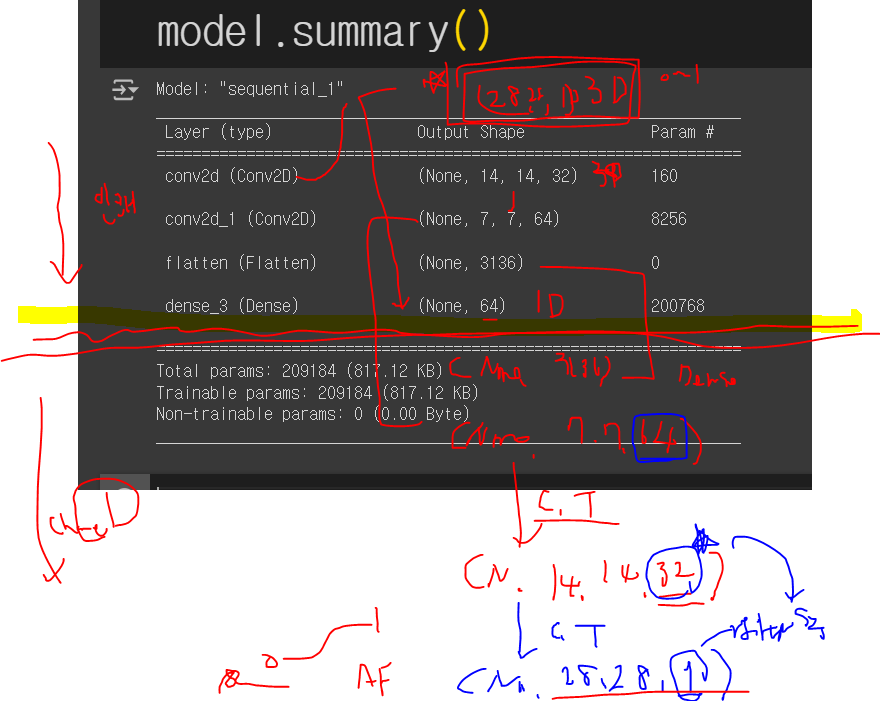

In [11]:
# 참조)
model_encoder = tf.keras.Sequential([

    # stride를 이용해서 conv1에서 크기를 줄임
    tf.keras.layers.Conv2D( input_shape =(28,28,1),
                           filters=32, kernel_size= 2, strides=(2,2),
                            activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2),
                           activation="relu"), # --->(7*7*64)
    ####################################################################
    # 3차원의 데이터의 차원을 1차원으로 축소!!!!!
    tf.keras.layers.Flatten(),
    ###########################################################
    # 28*28*1 1장에 대한 잠재적인 1차원 벡터(크기 64) :64개 숫자로 대표
    tf.keras.layers.Dense(units=64, activation="relu")]
)
model_encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_5 (Dense)             (None, 64)                200768    
                                                                 
Total params: 209184 (817.12 KB)
Trainable params: 209184 (817.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# ---> model을 학습을 시키자!!!
# (60000,28,28,1)가 들어가야 함!!!!!
model.compile( optimizer = tf.optimizers.Adam(),
              loss="mse")
model.fit( train_X, train_X, epochs= 20, batch_size= 512)

Epoch 1/20
118/118 [==============================] - 29s 228ms/step - loss: 0.0956
Epoch 2/20
118/118 [==============================] - 23s 194ms/step - loss: 0.0560
Epoch 3/20
118/118 [==============================] - 26s 218ms/step - loss: 0.0337
Epoch 4/20
118/118 [==============================] - 22s 188ms/step - loss: 0.0259
Epoch 5/20
118/118 [==============================] - 20s 173ms/step - loss: 0.0226
Epoch 6/20
118/118 [==============================] - 21s 179ms/step - loss: 0.0211
Epoch 7/20
118/118 [==============================] - 21s 178ms/step - loss: 0.0202
Epoch 8/20
118/118 [==============================] - 22s 184ms/step - loss: 0.0195
Epoch 9/20
118/118 [==============================] - 19s 162ms/step - loss: 0.0191
Epoch 10/20
118/118 [==============================] - 21s 178ms/step - loss: 0.0187
Epoch 11/20
118/118 [==============================] - 19s 157ms/step - loss: 0.0184
Epoch 12/20
118/118 [==============================] - 20s 171ms/step - lo

1/1 [==============================] - 0s 29ms/step


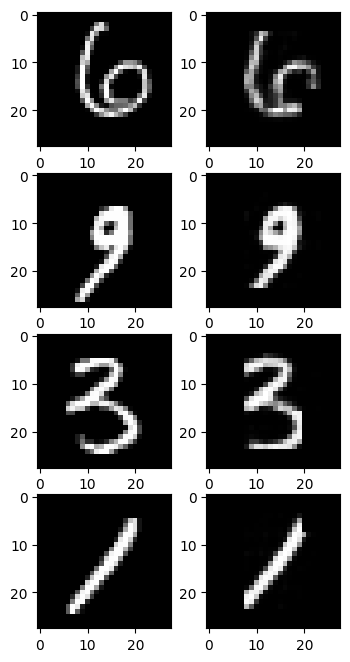

In [13]:
# Test를 통해서 잘 학습이 되었나..보겠습ㅂ니다.....
# ===> test_X에서 선별해서 시험을 해보겠습니다.
random_index = [100,1000,5000,8887]
plt.figure( figsize=(4,8))

for idx in range(4):
    # test입력
    plt.subplot(4,2,idx*2 + 1)
    select_idx = random_index[idx]
    plt.imshow( test_X[select_idx].reshape(28,28), cmap="gray")

    # 오른쪽에는 모델로 나온 결과를 출력
    plt.subplot(4,2,idx*2 + 2) # (1,784) : reshape,cv2[], etc,np.
    img = model.predict( np.expand_dims(test_X[select_idx], axis=0))
    # img ---- (784,)
    plt.imshow(img.reshape(28,28), cmap="gray")

In [ ]:
# 위의 AE 모델의 결과 분석
# 1) Dense로 한 모델1번 보다는 선명해 졌음
# 2) 지금 한 모델에서 나타나는 특징이 픽셀이 갑자기 짤리는 현상
#    ==> 값자기 중간에 픽셀의 값이 끊어지고, 0으로 확 떨어져서 검은색으로 보임

# 이유!
# 물론 학습이 충분하지 않아서도 있지만
# 근본적으로는 ReLU 문제
# 위의 ConvTranspoe 예시 그림에서 보듯이
# 0의 값이 나타나게 되면, 복원하는 과정에서 0의 값의 범위가 늘어남
# 중간에 픽셀의 값들이 0으로 떨어져서 끊어지는 이미지로 복원이 됨!
# 전반적인 것들은 잘 복원이 되지만,
# 중간에 짤리는 현상이 자주 나타남!

# 해결책!
# => Activation Function을 확 줄이는 ReLU 대신에
#      ELU 계열로 사용해서 음수값도 살리는 쪽의 AF을 사용하면 어떨까

In [14]:
# 시도3) 시도2의 Conv 사용하는 모델에서 AF만 relu 대신에
#        음수의 결과 값도 0이 아닌 작은 음의 값으로 하는 elu를 사용해보자.

model_elu = tf.keras.Sequential([
    tf.keras.layers.Conv2D( input_shape =(28,28,1), #28 * 28 이미지 받음
                           filters=32, kernel_size= 2, strides=(2,2),
                            activation="elu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2),
                           activation="elu"), # --->(7*7*64)

    tf.keras.layers.Flatten
     (),
    tf.keras.layers.Dense(units=64, activation="elu"),
    tf.keras.layers.Dense(units = 7*7*64, activation="elu"),

    tf.keras.layers.Reshape(target_shape=(7,7,64) ),
    tf.keras.layers.Conv2DTranspose( filters = 32,kernel_size=2, strides=(2,2),
                                    activation="relu"),
    tf.keras.layers.Conv2DTranspose( filters = 1, kernel_size=2,strides=(2,2),
                                    activation="sigmoid")
])
model_elu.summary()
# -===> 다 동일한데, 내부 AF만 relu ---> elu로 변경

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                200768    
                                                                 
 dense_7 (Dense)             (None, 3136)              203840    
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 14, 14, 32)       

In [15]:
# ---> model을 학습을 시키자!!!
# (60000,28,28,1)가 들어가야 함!!!!!
model_elu.compile( optimizer = tf.optimizers.Adam(),
              loss="mse")
model_elu.fit( train_X, train_X, epochs= 20, batch_size= 512)

Epoch 1/20
118/118 [==============================] - 23s 186ms/step - loss: 0.0822
Epoch 2/20
118/118 [==============================] - 20s 173ms/step - loss: 0.0356
Epoch 3/20
118/118 [==============================] - 22s 186ms/step - loss: 0.0246
Epoch 4/20
118/118 [==============================] - 20s 174ms/step - loss: 0.0195
Epoch 5/20
118/118 [==============================] - 22s 183ms/step - loss: 0.0167
Epoch 6/20
118/118 [==============================] - 22s 183ms/step - loss: 0.0153
Epoch 7/20
118/118 [==============================] - 20s 171ms/step - loss: 0.0146
Epoch 8/20
118/118 [==============================] - 22s 185ms/step - loss: 0.0141
Epoch 9/20
118/118 [==============================] - 20s 170ms/step - loss: 0.0138
Epoch 10/20
118/118 [==============================] - 22s 183ms/step - loss: 0.0136
Epoch 11/20
118/118 [==============================] - 20s 174ms/step - loss: 0.0134
Epoch 12/20
118/118 [==============================] - 22s 183ms/step - lo

1/1 [==============================] - 0s 33ms/step


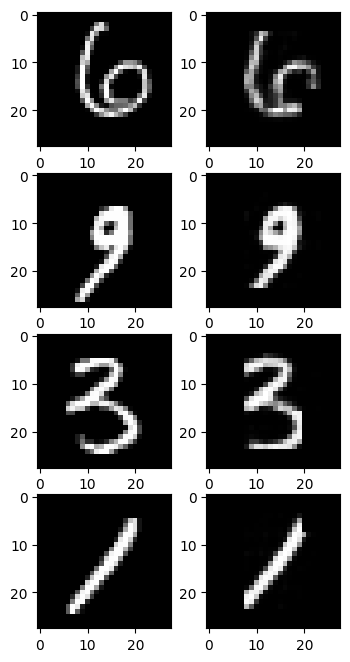

In [16]:
# Test를 통해서 잘 학습이 되었나..보겠습ㅂ니다.....
# ===> test_X에서 선별해서 시험을 해보겠습니다.
random_index = [100,1000,5000,8887]
plt.figure( figsize=(4,8))

for idx in range(4):
    # test입력
    plt.subplot(4,2,idx*2 + 1)
    select_idx = random_index[idx]
    plt.imshow( test_X[select_idx].reshape(28,28), cmap="gray")

    # 오른쪽에는 모델로 나온 결과를 출력
    plt.subplot(4,2,idx*2 + 2) # (1,784) : reshape,cv2[], etc,np.
    img = model.predict( np.expand_dims(test_X[select_idx], axis=0))
    # img ---- (784,)
    plt.imshow(img.reshape(28,28), cmap="gray")

In [ ]:
# elu로 AF을 수정한 모델의 분석

# 1) 앞에서 모델2에서 문제가 되었던 0으로 죽은 픽셀은 많이 살렸음!!!
# ==> 픽셀이 중간에서 딱 날라가는 현상은 많이 줄었음.
# 2) 그럼에도 불구하고,위/아래/좌우 중심으로 픽셀들이 짤리는 현상은 여전히 있음.

# Why???
# 우리가 크기에 대해서 고정을 하지 않고 그냥 진행을 했기 때문
# ==> padding을 마지막에 좀 넣어서 하면 어떨까.....:ConvTranspose에서

In [17]:
model_elu = tf.keras.Sequential([
    tf.keras.layers.Conv2D( input_shape =(28,28,1),
                           filters=32, kernel_size= 2, strides=(2,2),
                            activation="elu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2),
                           activation="elu"), # --->(7*7*64)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation="elu"), ##### 대칭축!!!
    tf.keras.layers.Dense(units = 7*7*64, activation="elu"),
    tf.keras.layers.Reshape(target_shape=(7,7,64) ),
    tf.keras.layers.Conv2DTranspose( filters = 32,kernel_size=2, strides=(2,2),
                                    activation="relu",
                                     # 추가 : 이미지가 상하좌우 짤리는
                                     padding="same"
                                     ),
    tf.keras.layers.Conv2DTranspose( filters = 1, kernel_size=2,strides=(2,2),
                                    activation="sigmoid",
                                     # 추가 : 이미지가 짤리는 거 방지.
                                     padding="same",
                                     )
])
model_elu.summary()
# -===> 다 동일한데, 내부 AF만 relu ---> elu로 변경

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        160       
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                200768    
                                                                 
 dense_9 (Dense)             (None, 3136)              203840    
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_4 (Conv2D  (None, 14, 14, 32)       

In [18]:
# ---> model을 학습을 시키자!!!
# (60000,28,28,1)가 들어가야 함!!!!!
model_elu.compile( optimizer = tf.optimizers.Adam(),
              loss="mse")
model_elu.fit( train_X, train_X, epochs= 20, batch_size= 512)

Epoch 1/20
118/118 [==============================] - 24s 193ms/step - loss: 0.0924
Epoch 2/20
118/118 [==============================] - 21s 179ms/step - loss: 0.0364
Epoch 3/20
118/118 [==============================] - 22s 186ms/step - loss: 0.0250
Epoch 4/20
118/118 [==============================] - 24s 201ms/step - loss: 0.0193
Epoch 5/20
118/118 [==============================] - 22s 190ms/step - loss: 0.0163
Epoch 6/20
118/118 [==============================] - 23s 190ms/step - loss: 0.0148
Epoch 7/20
118/118 [==============================] - 23s 195ms/step - loss: 0.0140
Epoch 8/20
118/118 [==============================] - 22s 184ms/step - loss: 0.0135
Epoch 9/20
118/118 [==============================] - 23s 192ms/step - loss: 0.0131
Epoch 10/20
118/118 [==============================] - 23s 191ms/step - loss: 0.0128
Epoch 11/20
118/118 [==============================] - 21s 178ms/step - loss: 0.0126
Epoch 12/20
118/118 [==============================] - 22s 189ms/step - lo

In [19]:
# conv2DTranspose 사용해서 복원의 과정을 거칠 때
# => 안쪽은 큰 문제가 별로 발생은 안 함.
# 자세히 주변/ 테두리를 보면, 이상한 현상이 나타나는 경우가 있음.
# ++ 중요한 부분도 보고 & 양쪽 테두리에 대한 현상도 잘 관찰!

# ====> 구조적으로 중간에 있는 정보를 복원할 때 넘겨주려는 구조!
# ++++ 저해상도 -- 고해상도로 이미지 복원을 하는 모델에서
#      ResNet과 같은 Conv의 결과를 D-Conv의 쪽으로 연결을 해줌!
# => 적은 데이터로 잘 되더라~~

# 기본적인 구조들을 이제는 블럭 단위로 바라봐야함
# + 픽셀의 값이 아니라 확률 분포로 넘어가야 함 -> 생성쪽으로

In [20]:
#### 잠시.....
#### ConvTranspose에서 padding, stride에 대해서 체크...
model_elu = tf.keras.Sequential([
    tf.keras.layers.Conv2D( input_shape =(28,28,1),
                           filters=32, kernel_size= 2, strides=(2,2),
                            activation="elu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2),
                           activation="elu"), # --->(7*7*64)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation="elu"), ##### 대칭축!!!
    tf.keras.layers.Dense(units = 7*7*64, activation="elu"),
    tf.keras.layers.Reshape(target_shape=(7,7,64) ),

    tf.keras.layers.Conv2DTranspose( filters = 32,
                                    kernel_size=2,
                                    #strides=(2,2),
                                    activation="elu",
                                     ### 추가 : 이미지가 상하좌우 짤리는
                                     #padding="same"
                                     )
])
model_elu.summary()
# -===> 7 * 7에 대한 2*2로 convTranspose : 8* 8 나타나게 됨.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        160       
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_10 (Dense)            (None, 64)                200768    
                                                                 
 dense_11 (Dense)            (None, 3136)              203840    
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_6 (Conv2D  (None, 8, 8, 32)         

In [21]:
#### 잠시.....
#### ConvTranspose에서 padding, stride에 대해서 체크...
model_elu = tf.keras.Sequential([
    tf.keras.layers.Conv2D( input_shape =(28,28,1),
                           filters=32, kernel_size= 2, strides=(2,2),
                            activation="elu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2),
                           activation="elu"), # --->(7*7*64)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation="elu"), ##### 대칭축!!!
    tf.keras.layers.Dense(units = 7*7*64, activation="elu"),
    tf.keras.layers.Reshape(target_shape=(7,7,64) ),
    tf.keras.layers.Conv2DTranspose( filters = 32,
                                    kernel_size=3,
                                    #strides=(2,2),
                                    activation="elu",
                                     ### 추가 : 이미지가 상하좌우 짤리는
                                     #padding="same"
                                     )
])
model_elu.summary()
# -===> 7 * 7에 대한 3*3으로 적용하면 convTranspose : 9*9 나타나게 됨.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        160       
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          8256      
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dense_12 (Dense)            (None, 64)                200768    
                                                                 
 dense_13 (Dense)            (None, 3136)              203840    
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_7 (Conv2D  (None, 9, 9, 32)         

In [22]:
#### 잠시.....
#### ConvTranspose에서 padding, stride에 대해서 체크...
model_elu = tf.keras.Sequential([
    tf.keras.layers.Conv2D( input_shape =(28,28,1),
                           filters=32, kernel_size= 2, strides=(2,2),
                            activation="elu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2),
                           activation="elu"), # --->(7*7*64)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation="elu"), ##### 대칭축!!!
    tf.keras.layers.Dense(units = 7*7*64, activation="elu"),
    tf.keras.layers.Reshape(target_shape=(7,7,64) ),
    tf.keras.layers.Conv2DTranspose( filters = 32,
                                    kernel_size=3,
                                    #strides=(2,2),
                                    activation="elu",
                                     ### 추가 : 이미지가 상하좌우 짤리는
                                     padding="same"
                                     )
])
model_elu.summary()
# -===> 7 * 7에 대한 3*3으로 적용하면 convTranspose : 9*9 나타나게 되는게 아니라
# ====> padding을 추가하게 되면,,,( 입력의 크기와 매칭을 해줌!!!)
# ====> 입력이 있던 7 * 7로 크기를 조절을 해주게 됨!!!!!!

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 14, 14, 32)        160       
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 64)          8256      
                                                                 
 flatten_6 (Flatten)         (None, 3136)              0         
                                                                 
 dense_14 (Dense)            (None, 64)                200768    
                                                                 
 dense_15 (Dense)            (None, 3136)              203840    
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_8 (Conv2D  (None, 7, 7, 32)         

In [ ]:
#### 잠시.....
#### ConvTranspose에서 padding, stride에 대해서 체크...
model_elu = tf.keras.Sequential([
    tf.keras.layers.Conv2D( input_shape =(28,28,1),
                           filters=32, kernel_size= 2, strides=(2,2),
                            activation="elu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2),
                           activation="elu"), # --->(7*7*64)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation="elu"), ##### 대칭축!!!
    tf.keras.layers.Dense(units = 7*7*64, activation="elu"),
    tf.keras.layers.Reshape(target_shape=(7,7,64) ),

    tf.keras.layers.Conv2DTranspose( filters = 32,
                                    kernel_size=2,
                                    strides=(2,2),
                                    activation="elu",
                                    ### 추가 : 이미지가 상하좌우 짤리는
                                    padding="same"
                                    )
])
model_elu.summary()

# -===> 7*7에서 2*2로 kernel_size를 하고,
#       stride로 (2,2)로 했기에...
#       padding을 하나 안하나 동일함..(모양상!!!!)
# ==> padding은 최종 적인 부분에서 걸렸고,,,
#     + stride가 같이 걸려서...7*7 ---> 14 * 14로 증가가 되는 것!!!!!!

In [ ]:
# ---> conv & convTranspose는 역으로 관계를 생각하면 되고,,,
#      모양을 대칭적으로 만들어지도록 코드화 작업을 하시면 됨!!!!!!
